### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


### Exploratory Data Analysis Steps....

* Univarate Analysis - Single Variable Analysis (Num: Histograms/Distplot| Cat: Countplot or Frequency Plot)

* Bivariate Analysis/Multivariate Analysis 
    * (Num vs Target(Num): Scatterplot & also Heatmap(Correlation Plot), 
    * Cat vs Num(Target): **Boxplot**/ViolinPlot/Barplot, 
    * Cat vs Cat (Target): Crosstab/Frequency - Countplot/Heatmap
    
    
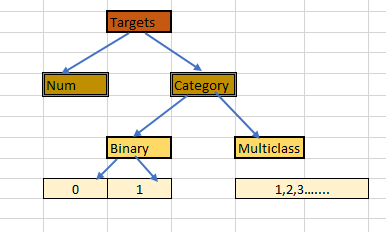
    
    
    

* Missing Values & Imputation - We are going to deal with the missing values...
     * If it is a Numerical Var: Use Mean/Median Imputation
     *  Categorical Var - Frequency....
     
* Outlier Analysis & Treatment

* **Feature Engineering**

* Encoding and Scaling...Standard Scaler or Min Max Scaler for Scaling and for Categorical Encoding - One Hot Encoding, Label Encoding, Target Encoding and Frequency Encoding...


In [1408]:
#financial data is always positively skewed

In [1]:
# Import the required libraries...

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv(r"E:\version2_GL\version 3\EDA_help\EDA (big_mart+DECKS)\train.csv")
test = pd.read_csv(r"E:\version2_GL\version 3\EDA_help\EDA (big_mart+DECKS)\test.csv")

In [5]:
# Preview the Dataset...
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Univariate Analysis

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#combine the data set
combined=pd.concat([train,test],ignore_index=True)

In [8]:
train.shape,test.shape,combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [9]:
# find all numerical var
combined.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
#combined['Item_Weight']=combined['Item_Weight'].astype('object')

In [11]:
#combined['Item_Weight']

In [12]:
#combined['Item_Weight']=combined['Item_Weight'].astype('float')

In [13]:
#combined['Item_Weight']

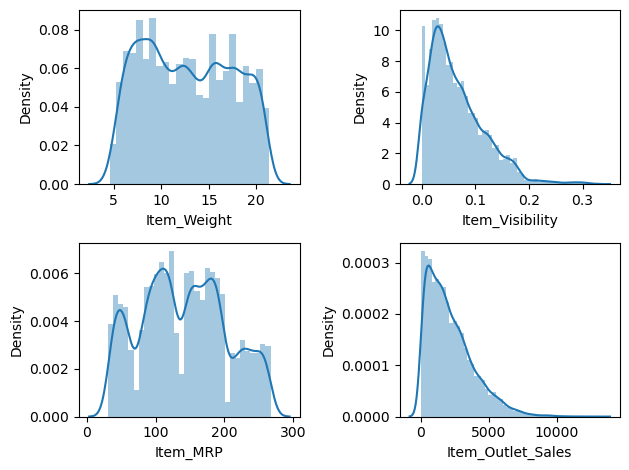

In [14]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']  
                            #Outlet_Establishment_Year is taken out not significant
nrows = 2 # Number of rows in the plot
ncols = 2 # No of Columns for the plot
iterator = 1 # Plot Iterator...


for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined[i])
    #sns.distplot(combined.loc[:,i])
    iterator+=1
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

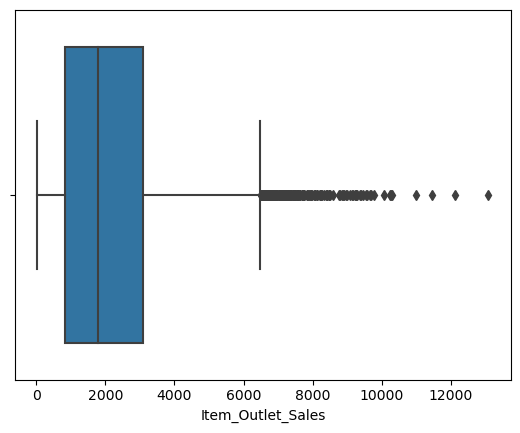

In [15]:
sns.boxplot(combined.Item_Outlet_Sales)  #we can see the target var has many outliers therefore in the above we can see it is right skewed

In [16]:
#cat var
combined.select_dtypes(include=object).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

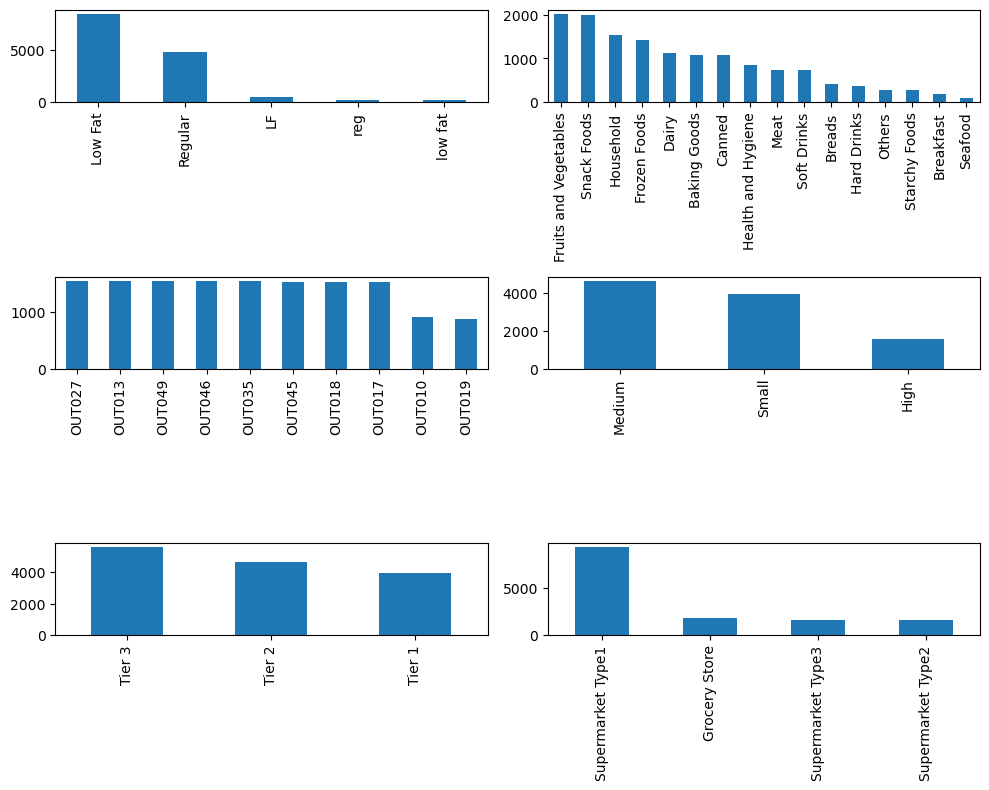

In [17]:
cat_cols=[ 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
#len(cat_cols)
nr=3
nc=2
iterator=1
plt.figure(figsize=(10,8))
for i in cat_cols:
    plt.subplot(nr,nc,iterator)
    #sns.countplot(combined.loc[:,i])
    combined[i].value_counts().plot(kind='bar')
    #combined.loc[:,i].value_counts().plot(kind='bar')
    iterator+=1
    
plt.tight_layout()
plt.show()

In [18]:
#combined.loc[:, 'Item_Type'].unique()
#combined['Item_Type'].unique()

In [19]:
#combined.loc[(combined.Outlet_Identifier=='OUT010')|(combined.Outlet_Identifier=='OUT019')].Outlet_Type.unique()

### Bivariate analysis

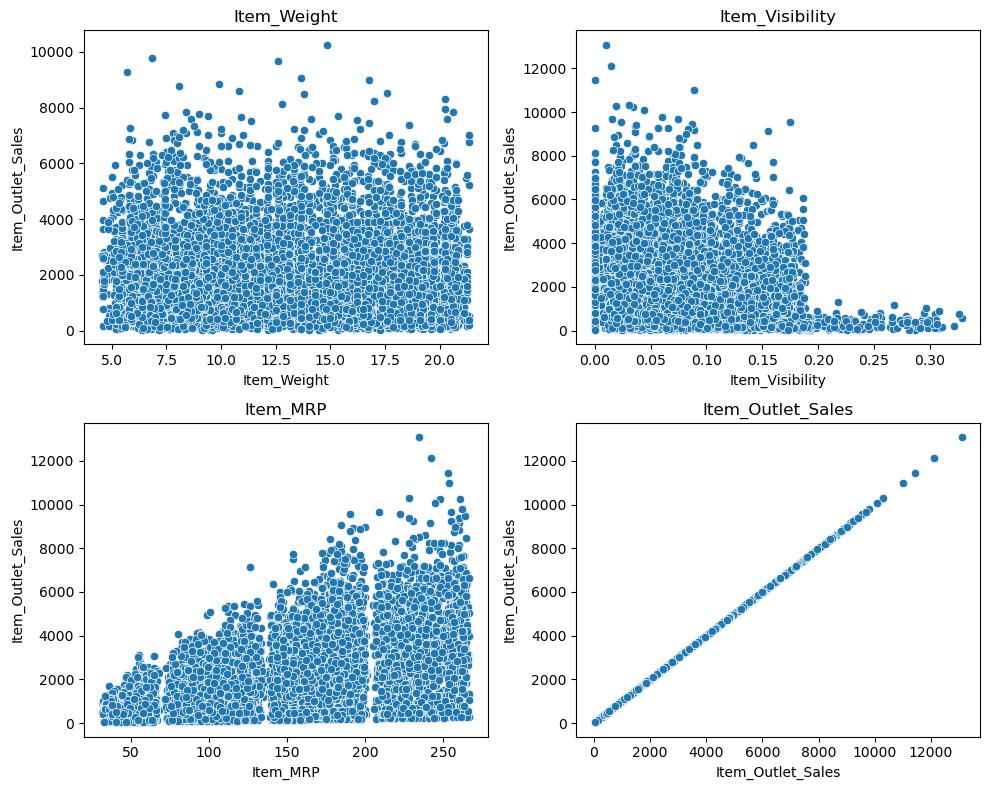

In [20]:
#num vs num
nr=2
nc=2
iterator=1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(2,2,iterator)
    sns.scatterplot(combined.loc[:,i],combined.Item_Outlet_Sales)
    #plt.scatter(combined.loc[:,i],combined.Item_Outlet_Sales)
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()

In [21]:
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [22]:
#nc=combined.select_dtypes(include=np.number)
#nc1=nc.drop(columns='Outlet_Establishment_Year')
#sns.pairplot(nc1)   #hit n trial

In [23]:
# lets verify lets see 1 row of df inference 3
#combined #-->Lets see the first row
combined.loc[combined['Item_Identifier']=='FDA15'] #we can see 
# FD-> food DR-->dink, nc-->non consumable

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208
9638,FDA15,9.3,Low Fat,0.016022,Dairy,249.9092,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [24]:
# Fix the Item Fat Content

combined.Item_Fat_Content.replace(to_replace = ["low fat", "LF","reg"],
                                 value = ["Low Fat", "Low Fat", "Regular"],
                                 inplace = True)

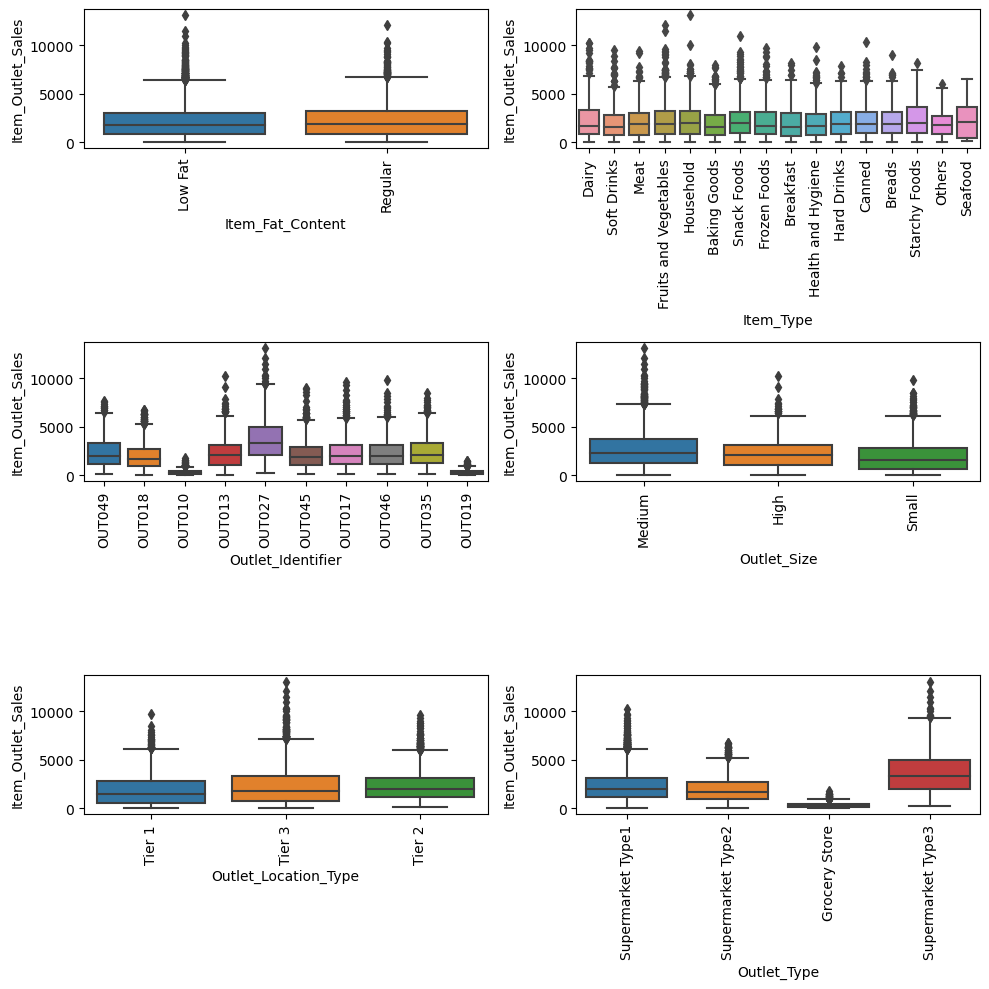

In [25]:
# Cat vs Num

nrows = 3
ncols = 2
rep = 1

plt.figure(figsize = (10, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, rep)
    sns.boxplot(data = combined, 
                x = i, y = "Item_Outlet_Sales")
    plt.xticks(rotation = 90)
    rep+=1
    
plt.tight_layout()
plt.show()

In [26]:
# h.w Titanic  

#  Day2

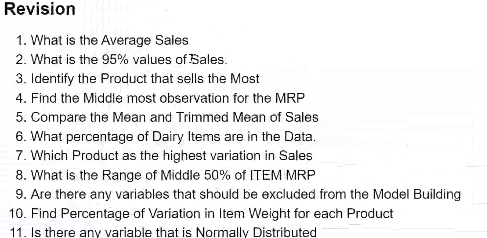

In [27]:
# what us the avarage sales
combined['Item_Outlet_Sales'].mean()

2181.2889135750365

In [28]:
#what is the 95% values of Sales
combined['Item_Outlet_Sales'].quantile(0.95)

5522.811

In [29]:
# identify the product that sells the most
combined[['Item_Type','Item_Outlet_Sales']].mode() #the item which is more in no will have the highest sales
#combined[['Item_Type','Item_Outlet_Sales']].groupby('Item_Type').sum().sort_values(by='Item_Outlet_Sales',ascending=False).iloc[0,:]

,Item_Type,Item_Outlet_Sales
0,Fruits and Vegetables,958.752


In [30]:
combined[['Item_Type','Item_Outlet_Sales']].mode()

,Item_Type,Item_Outlet_Sales
0,Fruits and Vegetables,958.752


In [31]:
# find the middle most val for the mrp
combined['Item_MRP'].median()

142.247

In [32]:
from scipy import stats

In [33]:
#trimmed mean n mean of sales compare
print('mean of sale',combined.Item_Outlet_Sales.mean())
#print('trimmed mean of sale',stats.trim_mean(combined.Item_Outlet_Sales, 0.1) )
print('trimmed mean of sale',stats.trim_mean(train.Item_Outlet_Sales, 0.01) ) #since nan values exist in combined so taking trained data set

mean of sale 2181.2889135750365
trimmed mean of sale 2138.3762353405964


In [34]:
#what percentage of dairy items are in the data
(combined[combined.Item_Type=='Dairy'].shape[0]/combined.shape[0])*100

7.997747113489158

In [35]:
#which product has the highest variance in sales
combined.groupby('Item_Type')['Item_Outlet_Sales'].std()

Item_Type
Baking Goods             1546.788045
Breads                   1644.235914
Breakfast                1911.693586
Canned                   1645.235638
Dairy                    1884.404698
Frozen Foods             1724.777720
Fruits and Vegetables    1799.503459
Hard Drinks              1606.191587
Health and Hygiene       1553.633063
Household                1692.245757
Meat                     1695.231081
Others                   1431.860471
Seafood                  1842.988719
Snack Foods              1705.121755
Soft Drinks              1674.249752
Starchy Foods            1773.945328
Name: Item_Outlet_Sales, dtype: float64

In [36]:
#what is the middle 50% of  Item Mrp
combined.Item_MRP.quantile(0.75)-combined.Item_MRP.quantile(0.25)   #IQR=q3-q1 or middle 50%


91.84360000000001

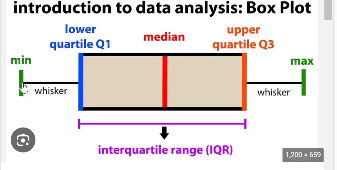

In [37]:
#are there any column that should be excluded for model building
#if std dev of var is 0 it should not beincluded
#key aspect of model building is variance n if it is 0 no information will be deduced from the column

combined.loc[:,num_cols].std() #Item_Visibility     is ratio hence it is already in percentage hence we will not exclude it
                                                #hence we will not exclude any col

Item_Weight             4.652502
Item_Visibility         0.051459
Item_MRP               62.086938
Item_Outlet_Sales    1706.499616
dtype: float64

In [38]:
combined.loc[:,num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,2181.288914
std,4.652502,0.051459,62.086938,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.710000,0.027036,94.012000,834.247400
50%,12.600000,0.054021,142.247000,1794.331000
75%,16.750000,0.094037,185.855600,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [39]:
#find percentage of variation in item weight for each product
for i in combined.Item_Type.unique():
    print("COV of",i,"="\
          ,(combined.loc[combined.Item_Type==i,'Item_Weight'].std())/   #std/mean
          (combined.loc[combined.Item_Type==i,'Item_Weight'].mean()))


COV of Dairy = 0.3522131559667388
COV of Soft Drinks = 0.3739373755063583
COV of Meat = 0.36427904399146166
COV of Fruits and Vegetables = 0.34619738596516203
COV of Household = 0.37318900890557427
COV of Baking Goods = 0.38654370213844974
COV of Snack Foods = 0.35344333082714907
COV of Frozen Foods = 0.35902889490246304
COV of Breakfast = 0.3958751726877388
COV of Health and Hygiene = 0.34551534644867415
COV of Hard Drinks = 0.36538886491627387
COV of Canned = 0.37480312491089857
COV of Breads = 0.41534694108394005
COV of Starchy Foods = 0.30978044214220474
COV of Others = 0.29591605049643105
COV of Seafood = 0.4132620732230003


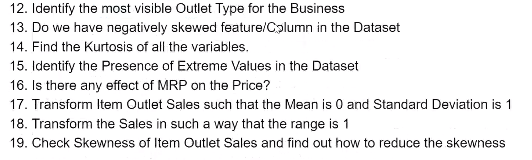

<AxesSubplot:>

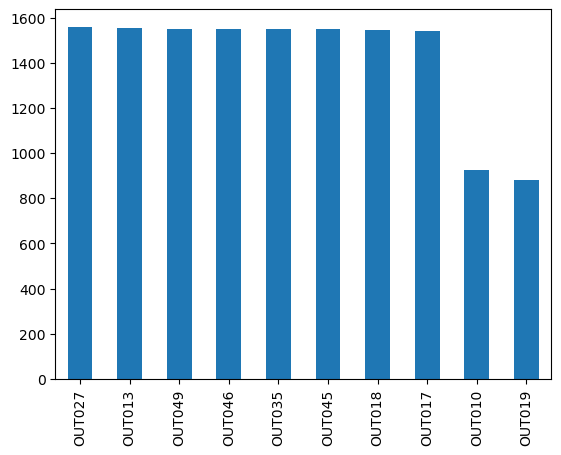

In [40]:
combined.Outlet_Identifier.value_counts().plot(kind='bar')


#OUT027    1559
#OUT013    1553

### Scaling
* standard scaler

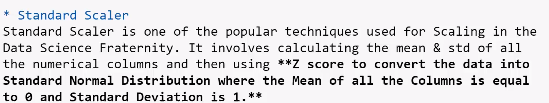
* Normalization

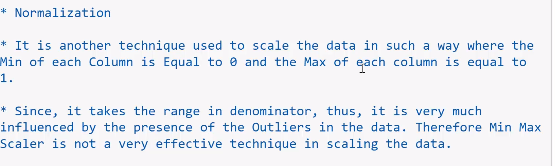
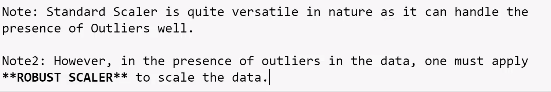

In [41]:
train.loc[:,num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc=StandardScaler()#m/c instance (m/c will learn mean n sd info which will go in sc) 


In [43]:
#pip install sklearn# remember how to install package

In [44]:
#remember how to use team viewer for project

In [45]:
#lets scale the data
#sc=(xi-mean)/sigma
# using just .fit will only learn the mean n the S.D , 
#fit_transform() will not only learn the mean n the S.D , but also convert


scaled=sc.fit_transform(pd.DataFrame(combined.Item_MRP))  # takes the value in 2D format (therefore, supply Data frame not series)

In [46]:
scaled

array([[ 1.75251118],
       [-1.4936965 ],
       [ 0.00987397],
       ...,
       [-0.35855788],
       [ 1.18574722],
       [-0.98589388]])

In [47]:
print(pd.DataFrame(scaled,columns=['ZScore']).mean())   # nearly 0
print(pd.DataFrame(scaled,columns=['ZScore']).std())     # nearly 1

ZScore   -1.391374e-16
dtype: float64
ZScore    1.000035
dtype: float64


In [48]:
sc=StandardScaler()
scaled=sc.fit_transform(combined.loc[:,num_cols])

In [49]:
scaled,num_cols

(array([[-0.75077936, -0.96985228,  1.75251118,  0.910601  ],
        [-1.47730101, -0.90706338, -1.4936965 , -1.01844035],
        [ 1.01178797, -0.95600038,  0.00987397, -0.04923754],
        ...,
        [-0.60031629,  0.14722609, -0.35855788,         nan],
        [ 0.53890405, -1.28171205,  1.18574722,         nan],
        [-0.70778991,  0.7533967 , -0.98589388,         nan]]),
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'])

In [50]:
pd.DataFrame(scaled,columns=num_cols)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.750779,-0.969852,1.752511,0.910601
1,-1.477301,-0.907063,-1.493696,-1.018440
2,1.011788,-0.956000,0.009874,-0.049238
3,1.377198,-1.281712,0.661838,-0.849103
4,-0.830310,-1.281712,-1.403623,-0.695373
...,...,...,...,...
14199,-0.492843,-1.019425,0.005000,NaN
14200,-1.116190,1.497142,0.453249,NaN
14201,-0.600316,0.147226,-0.358558,NaN
14202,0.538904,-1.281712,1.185747,NaN


In [51]:
pd.DataFrame(scaled,columns=num_cols).describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,1.176500e+04,1.420400e+04,1.420400e+04,8.523000e+03
mean,-2.569602e-16,-4.775741e-17,-1.391374e-16,1.631662e-16
std,1.000043e+00,1.000035e+00,1.000035e+00,1.000059e+00
min,-1.770704e+00,-1.281712e+00,-1.767181e+00,-1.258790e+00
25%,-8.775982e-01,-7.563065e-01,-7.569166e-01,-7.894057e-01
50%,-4.145348e-02,-2.318886e-01,2.000528e-02,-2.267687e-01
75%,8.505775e-01,5.457876e-01,7.224096e-01,5.391513e-01
max,1.839335e+00,5.100167e+00,2.027606e+00,6.391045e+00


In [52]:
#min_max_scaler
mmax=MinMaxScaler()
mmax.fit_transform(combined.loc[:,num_cols])

array([[0.28252456, 0.04886645, 0.92750715, 0.28358666],
       [0.08127419, 0.05870508, 0.0720684 , 0.03141895],
       [0.77076511, 0.05103696, 0.46828841, 0.15811486],
       ...,
       [0.32420363, 0.22390557, 0.37119946,        nan],
       [0.63977374, 0.        , 0.77815384,        nan],
       [0.29443287, 0.31888866, 0.20588425,        nan]])

In [53]:
pd.DataFrame(mmax.fit_transform(combined.loc[:,num_cols]),columns=num_cols)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.048866,0.927507,0.283587
1,0.081274,0.058705,0.072068,0.031419
2,0.770765,0.051037,0.468288,0.158115
3,0.871986,0.000000,0.640093,0.053555
4,0.260494,0.000000,0.095805,0.073651
...,...,...,...,...
14199,0.353974,0.041099,0.467004,NaN
14200,0.181304,0.435429,0.585126,NaN
14201,0.324204,0.223906,0.371199,NaN
14202,0.639774,0.000000,0.778154,NaN


In [54]:
print(pd.DataFrame(mmax.fit_transform(combined.loc[:,num_cols]),columns=num_cols).min())
print(pd.DataFrame(mmax.fit_transform(combined.loc[:,num_cols]),columns=num_cols).max())

Item_Weight          0.0
Item_Visibility      0.0
Item_MRP             0.0
Item_Outlet_Sales    0.0
dtype: float64
Item_Weight          1.0
Item_Visibility      1.0
Item_MRP             1.0
Item_Outlet_Sales    1.0
dtype: float64


In [55]:
def minmax(xi):
    return (xi-min(xi))/(max(xi)-min(xi))
    
    
    

In [56]:
minmax(combined.Item_MRP).describe()

count    14204.000000
mean         0.465686
std          0.263529
min          0.000000
25%          0.266224
50%          0.470958
75%          0.656055
max          1.000000
Name: Item_MRP, dtype: float64

#### Transformation

**why transform**
* The purpose of transformation is to reduce the **SKEWNESS** in the data.
* Most of the tstatistical models have an assumption about the data that it should be normally distributed or in the form of Gaussian curve
* we can apply some of the transformation techniques to to reduce the data
* those techniques are as follows :
    * Log Transformation
    * SQRT Transformation
    * CBRT Transformation
    * Reciprocal Transformation

**NOTE**
* we don't do scaling n transformation together (we use either one)
* in transformation we want ki model ke hisab se align ho jai values
* in Transformation we just apply the transformations on any one column n then go with that one which gives the best result for remaining columns

In [57]:
np.log(0)

-inf

1.1775306028542796


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

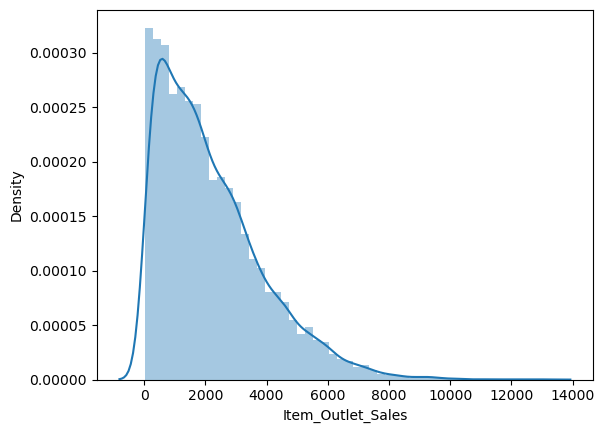

In [58]:
print(train.Item_Outlet_Sales.skew())   # skewness if b/w 0.5 to -0.5 then normal
sns.distplot(train.Item_Outlet_Sales)

-0.887753343209305


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

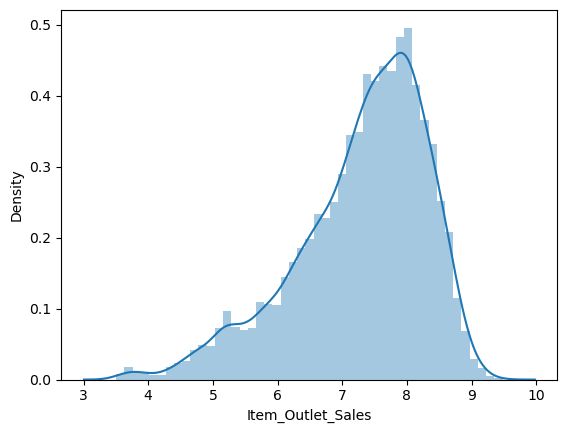

In [59]:
#apply log transformation
print(np.log(train.Item_Outlet_Sales).skew())
sns.distplot(np.log(train.Item_Outlet_Sales))

0.23467599347099247


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

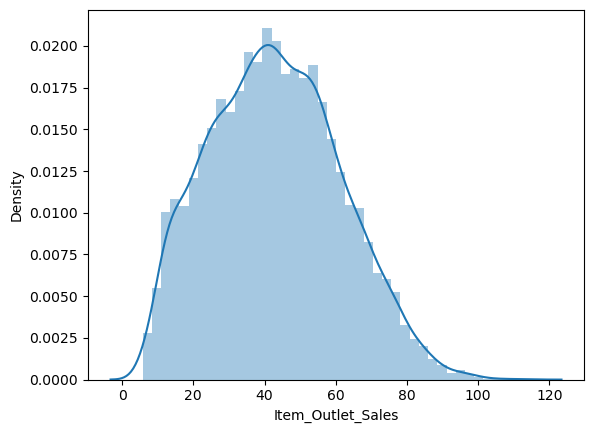

In [60]:
#apply SQRT transformation
print(np.sqrt(train.Item_Outlet_Sales).skew())
sns.distplot(np.sqrt(train.Item_Outlet_Sales))

-0.10250699736722735


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

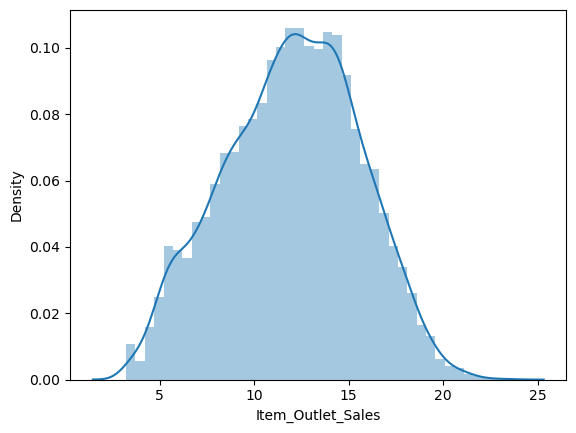

In [61]:
#apply CBRT transformation
print(np.cbrt(train.Item_Outlet_Sales).skew())
sns.distplot(np.cbrt(train.Item_Outlet_Sales))

5.679237323396784


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

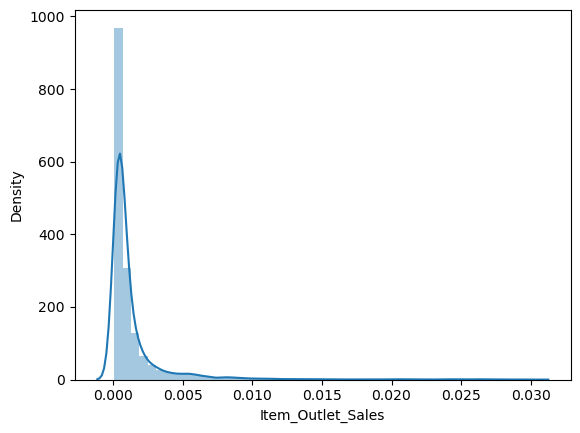

In [62]:
#apply reciprocal transformation
print(np.reciprocal(train.Item_Outlet_Sales).skew())
sns.distplot(np.reciprocal(train.Item_Outlet_Sales))

In [63]:
# Remember inverse transformation exists in competitions (eg we have been given log transformed data then
#we will apply its opp i.e exponent then we will get)

#### Box Cox Transformation & Yeo-Johnson Transformation

#they r the most versatile TRansformation

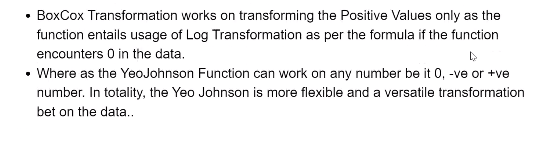

**in simple words:**<br>
Yeo-Johnson will work in similar fashion as Boxcox but the **Difference is** <br>
Box Cox Transformation       ::: only works for positive values
Yeo-Johnson Transformation   ::: can work on non positive values as well , therefore the most versatile function

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

-0.0749649223767276


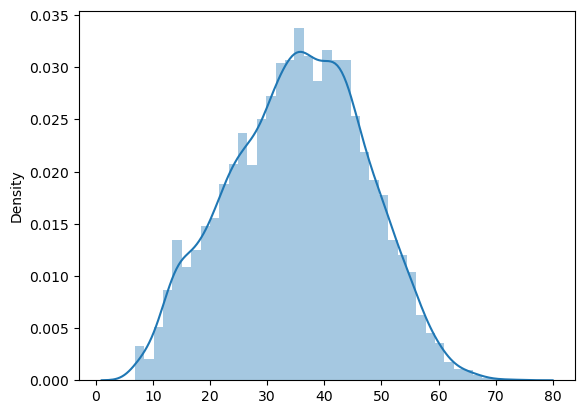

In [64]:

sns.distplot(stats.boxcox(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.boxcox(train.Item_Outlet_Sales)[0]))

-0.07477744470274916


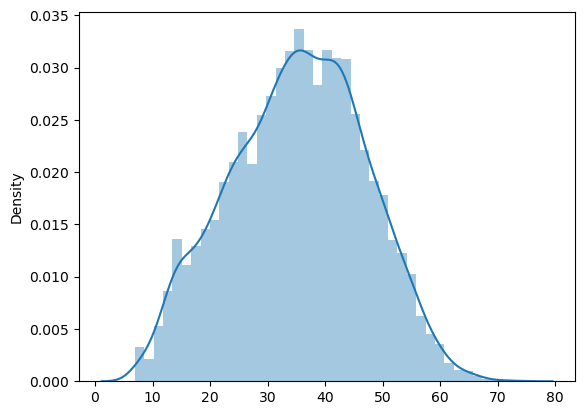

In [65]:
#Yeo-Johnson
sns.distplot(stats.yeojohnson(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.yeojohnson(train.Item_Outlet_Sales)[0]))

# Day 3

### Missing Values

* Rule says if 95% or more data is missing in the column, then it is best to drop that column.   

Note: This is a theoretical rule. The point is to find the pattern in the data in such a way that you can handle most of the missing values in the data....

* Now, basis discussion, we see that prima facie, we can consider the mode of the categorical variable & Median in Numerical Variable to impute the missing value. 

* However, this approach might not work because we have not explore the pattern from the rest of the columns/features.

* Therefore, we need to do the pattern exploration on priority to find out the closest possible pattern for the missing value and then impute it accordingly,

* In the event of the pattern not being available or unable to mine the pattern, its always good to build the model and deal with the missing values accordingly.

In [66]:
combined.isnull().sum()  # no of missing values in the columns

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [67]:
train.shape,test.shape   
# this is why  Item_Outlet_Sales     has       5681 
# empty values as that is what we have to predict(target var)


((8523, 12), (5681, 11))

In [68]:
#mode of Outlet_Size
combined.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [69]:
#OUTLET SIZE IS MISSING

combined.loc[combined['Outlet_Size'].isnull(),:].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [70]:
#b4 we move on n substitute lets see what all columns triangulate to Outlet_Size columns and also see the 
#inference in bivariate,univariate analysis

In [71]:
combined.loc[combined['Outlet_Size'].isnull(),'Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

**NOTE** <br>
* so basis single value we cannot substitute we need to see the relation with other columns
* in univariate analysis we could see sales of OUT 10,19  is min  & medium outlet's sale is very high
* if we fill in medium in correspondance to out 10 (less mode most probably grocery store),so this should be small
* Medium kind of would v=be good fit for outlet 27 had it been missing
* bias would be introduced if we fill medium
* we r giving m/c confusing pattern therefore prediction would not be good

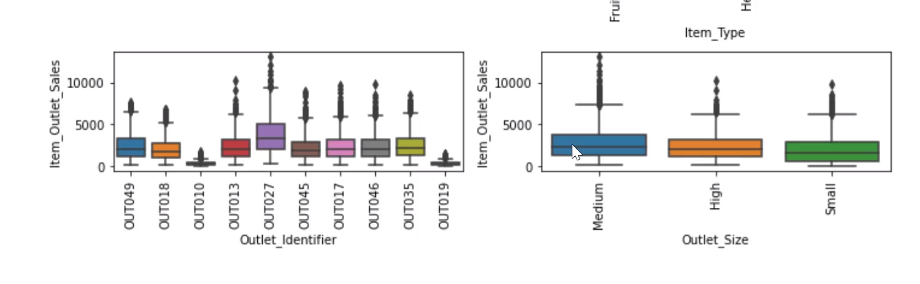

In [72]:
combined.loc[combined.Outlet_Identifier=='OUT019',:].head(2) 
#both 10 n 19 have low sales  so imputing medium which corresponds to high sales 
                                   #as out 27 is medium n has high sales so imputing medium seem wrong 
                                    #basis the pattern  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [73]:
combined.loc[combined.Outlet_Type=='Grocery Store','Outlet_Size'].unique() 

array([nan, 'Small'], dtype=object)

In [74]:
# Imputting the missing value in Outlet_Size

In [75]:
# Imputting the 'Small' in OUT010
combined.loc[(combined.Outlet_Identifier=='OUT010')&(combined.Outlet_Size.isnull())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
14094,FDI15,13.800,Low Fat,0.236595,Dairy,265.0884,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14095,NCH43,8.420,Low Fat,0.118118,Household,216.9192,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14103,FDA23,9.800,Low Fat,0.078981,Baking Goods,100.1016,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14173,FDC10,9.800,Regular,0.121982,Snack Foods,119.7098,OUT010,1998,NaN,Tier 3,Grocery Store,NaN


In [76]:
combined.loc[(combined.Outlet_Identifier=='OUT010')&\
             (combined.Outlet_Size.isnull()),"Outlet_Size"]='Small'


In [77]:
combined.loc[(combined.Outlet_Identifier=='OUT045'),
             "Outlet_Type"].unique()  # check Outlet_Type for OUT017 too

array(['Supermarket Type1'], dtype=object)

In [78]:
combined.loc[(combined.Outlet_Identifier=='OUT017'),
             "Outlet_Type"].unique()  

array(['Supermarket Type1'], dtype=object)

In [79]:
# via bivariate analysis pattern we r not able to deduce anything for S1 outlet type so lets check size of s1 outlet
#b4 substituting medium we further try finding the pattern in the existing data

In [80]:
# lets check Outlet_Size where  Outlet_Type is 'Supermarket Type1' 
combined.loc[combined.Outlet_Type=='Supermarket Type1' ,'Outlet_Size'].unique() # we cannot see any pattern now lets see 
                                                                                #the mode

array(['Medium', 'High', nan, 'Small'], dtype=object)

In [81]:
combined.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].value_counts() #could not find 45 n 17 even in below
# in below op we can see freq of small is high

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT010             Grocery Store      Small           925
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [82]:
combined.loc[combined.Outlet_Type=='Supermarket Type1' ,'Outlet_Size'].mode()[0]

'Small'

In [83]:
#imputing small in remaining data
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Size']='Small'

In [84]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [85]:
#Item_Weight                  ,  Item_Visibility                  remain

In [86]:
#Item_Weight    trying to impute

In [87]:
combined.loc[:,num_cols]  #since we r dealing with imputation of numeric col
                            # therefore, to find its relationship with other numeric col
                            #significane with other numeric col , lets plot a heatmap
        #item weight with mrp does it have some corr that is what we r trying to check
        

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052
...,...,...,...,...
14199,10.50,0.013496,141.3154,NaN
14200,7.60,0.142991,169.1448,NaN
14201,10.00,0.073529,118.7440,NaN
14202,15.30,0.000000,214.6218,NaN


<AxesSubplot:>

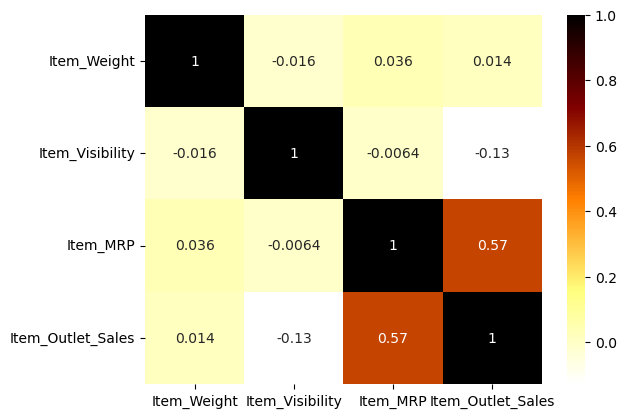

In [88]:
sns.heatmap(combined.loc[:,num_cols].corr(),annot=True,cmap='afmhot_r')

In [89]:
#Item_Weight    trying to impute
combined.loc[combined.Item_Identifier=='FDA15','Item_Weight']   # guess if Item_Identifier has some influence on weight

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
9638    9.3
Name: Item_Weight, dtype: float64

In [90]:
combined.loc[combined.Item_Identifier=='DRC01','Item_Weight'] 

1        5.92
2272     5.92
2927      NaN
5029     5.92
5077     5.92
5218     5.92
9453     5.92
10588    5.92
12787    5.92
Name: Item_Weight, dtype: float64

In [91]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [92]:
combined.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [93]:
combined.loc[combined.Item_Identifier=='FDA15','Item_Weight']

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
9638    9.3
Name: Item_Weight, dtype: float64

In [94]:
combined.loc[(combined.Item_Identifier=='FDA15')&\
             (combined['Item_Weight'].isnull()),'Item_Weight']

6696   NaN
Name: Item_Weight, dtype: float64

#####  Below is my appraoach to fill ... but sir has given a d/f approach to fill the data

In [95]:
# only item visibility remains

In [96]:
combined.Item_Weight.isnull().sum()

2439

In [97]:
# hint

*********************************************************************************

*********************************************************************************

*********************************************************************************

In [98]:
combined.loc[combined.Item_Weight.isnull()].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [99]:
combined.loc[7,'Item_Weight']=combined.loc[combined.Item_Identifier=='FDP10','Item_Weight'].median()

In [100]:
combined.loc[combined.Item_Weight.isnull()].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.668


*********************************************************************************

*********************************************************************************

*********************************************************************************

sir's another way of filling the values (in item_weight n visibility):-

In [101]:
combined['Item_Weight']=combined.groupby('Item_Identifier')\
['Item_Weight'].apply(lambda x:x.fillna(x.median()))

In [102]:
combined.Item_Weight.isnull().sum()

0

In [103]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [104]:
combined.loc[combined['Item_Visibility']==0,('Item_Identifier','Item_Visibility')]

,Item_Identifier,Item_Visibility
3,FDX07,0.0
4,NCD19,0.0
5,FDP36,0.0
10,FDY07,0.0
32,FDP33,0.0
...,...,...
14166,FDQ19,0.0
14171,FDK26,0.0
14177,FDQ57,0.0
14184,DRG37,0.0


In [105]:
combined.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [106]:
#combined.loc[((combined.Item_Identifier=='FDA15')&(combined['Item_Visibility']!=0)),'Item_Visibility'].median()

In [107]:
for i in combined.Item_Identifier.unique():
    cal_val=combined.loc[((combined.Item_Identifier==i)&(combined['Item_Visibility']!=0)),'Item_Visibility'].median()
    combined.loc[(combined.Item_Identifier==i)&(combined['Item_Visibility']==0),'Item_Visibility']=cal_val

In [108]:
combined['Item_Visibility']=combined.groupby('Item_Identifier')\
['Item_Visibility'].apply(lambda x:x.replace(to_replace=0,value=x.median()))

In [109]:
combined.isnull().sum().loc[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

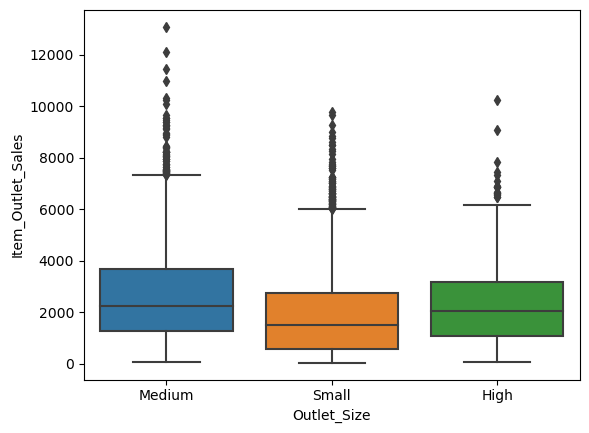

In [110]:
sns.boxplot(data=combined,x='Outlet_Size',y='Item_Outlet_Sales')

In [111]:
#eda ic day 1 done 

# Day 4

### Feature Engineering

In [112]:
#binning of categorical data : reduction/simplification of categories.why do we need this?

In [113]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022919,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013206,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [114]:
combined.shape

(14204, 12)

In [115]:
pd.get_dummies(combined).shape

(14204, 1602)

In [116]:
pd.get_dummies(combined).head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.022919,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.013206,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [117]:
combined.Item_Identifier.nunique() # there are 1559 ids therefore so many columns as dummies 

1559

### Feature Engineering

Bin the Item Identifier and Item Type
Note: The Purpose of creating new features and binning is to make sure that the machine is able to capture the pattern well. This concept is known as Generalization.

In [118]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022919,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013206,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:

#lets extract the 1st 2 leters from item id
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [120]:
pd.Series(ids)

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Length: 14204, dtype: object

In [121]:
combined['Item.IDS']=pd.Series(ids)

In [122]:
combined['Item.IDS'].nunique() #read signal vs noise in ml

3

#### Steps that I Follow

* Univariate
* Biv
* Feature Engineering - Most Important Step..
* Missing Values
* Outlier Analysis and Removal - This is the step where I split the data in train and test back again.
* Scaling and Transformation
* Categorical Encoding

**Why I split the Data in Train and Test Before Outliers??**
* You remove the Outliers from training data only and not from test.
* Train - that dataset on which the model will get trained
* Test - is that dataset on which the model will **predict**.


In [123]:
#see google automated car video ... interesting

In [124]:
#pattern item ids vs item outlet sales

<AxesSubplot:xlabel='Item.IDS', ylabel='Item_Outlet_Sales'>

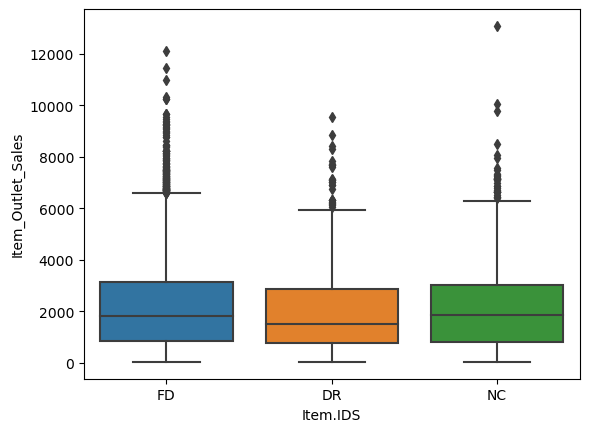

In [125]:
sns.boxplot(data=combined,x='Item.IDS',y='Item_Outlet_Sales')

In [126]:

combined.loc[combined['Item.IDS']=='NC'].head() # we see NC are thought of as low fat in Item_Fat_Content col
                                        # can NC be low Fat?no then, let us instead substitute it by Non_Edible

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS
4,NCD19,8.93,Low Fat,0.013206,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
16,NCB42,11.80,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,NC
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,NC
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080,NC
31,NCS17,18.60,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644,NC


In [127]:
combined.loc[combined['Item.IDS']=='NC','Item_Fat_Content']='Non_Edible'

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

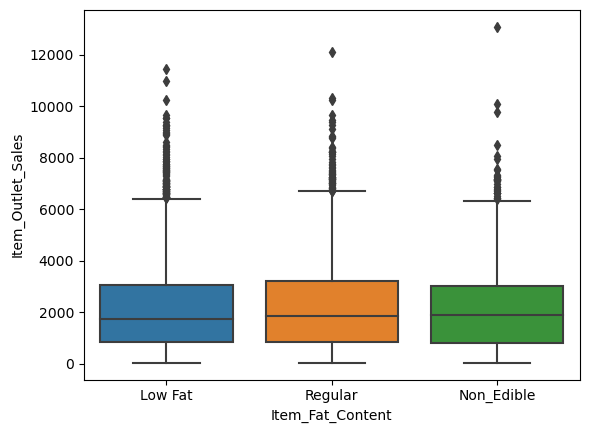

In [128]:
sns.boxplot(data=combined,x='Item_Fat_Content',y='Item_Outlet_Sales')

In [129]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022919,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non_Edible,0.013206,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [130]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [131]:
perishables=['Dairy',  'Meat', 'Fruits and Vegetables',         #perishable especially of food) likely to decay or 
            'Breakfast','Breads', 'Starchy Foods', 'Seafood']      #go bad quickly.
non_perishable=['Soft Drinks', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
               'Hard Drinks', 'Canned']

In [132]:
for i in combined.Item_Type.unique():
    if i in perishables:
        combined.loc[combined.Item_Type==i,'Item_Type']='Perishables'
    elif i in non_perishable:
        combined.loc[combined.Item_Type==i,'Item_Type']='Non_Perishables'
    else:
        combined.loc[combined.Item_Type==i,'Item_Type']='Non_Eatery'

In [133]:
#def perish(x):
#    if x in perishables:
 #       return ('Perishables')
#    elif x in non_perishable:
#        return ('Non_Perishables')    
 #   else:
#        return('#')

In [134]:
#combined.Item_Type=combined.Item_Type.apply(perish)

In [135]:
#combined.Item_Type.apply(perish).unique()
combined.Item_Type.unique()

array(['Perishables', 'Non_Perishables', 'Non_Eatery'], dtype=object)

In [136]:
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022919,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non_Edible,0.013206,Non_Eatery,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Non_Perishables,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD
14200,FDD47,7.60,Regular,0.142991,Perishables,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD
14201,NCO17,10.00,Non_Edible,0.073529,Non_Eatery,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,NC
14202,FDJ26,15.30,Regular,0.084897,Non_Perishables,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,FD


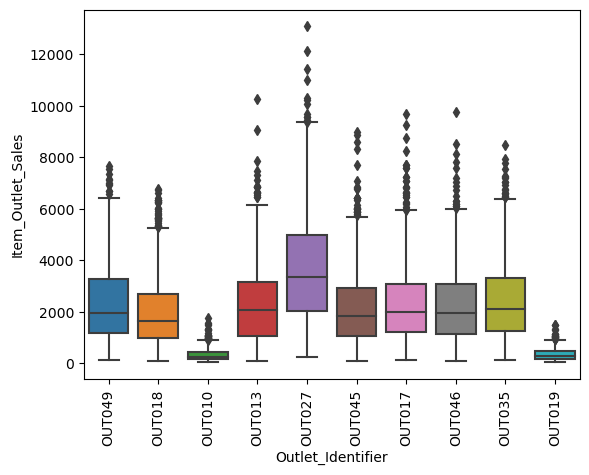

In [137]:
sns.boxplot(data=combined,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

In [138]:
# seggregating in top average n bad performers
combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [139]:
combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].max().sort_values(ascending=False)

Outlet_Identifier
OUT027    13086.9648
OUT013    10256.6490
OUT046     9779.9362
OUT017     9664.7528
OUT045     8994.9580
OUT035     8479.6288
OUT049     7646.0472
OUT018     6768.5228
OUT010     1775.6886
OUT019     1482.0708
Name: Item_Outlet_Sales, dtype: float64

In [140]:
#combined.Outlet_Identifier.unique()

In [141]:
top=['OUT027','OUT013','OUT046']
low=['OUT010', 'OUT019']


In [142]:
def outlet(x):
    if x in top:
        return ("Top_perf")
    elif x in low:
        return ("Low_perf")
    else:
        return('Avg_perf')

In [143]:
combined['Outlets']=combined['Outlet_Identifier'].apply(outlet)

<AxesSubplot:xlabel='Outlets', ylabel='Item_Outlet_Sales'>

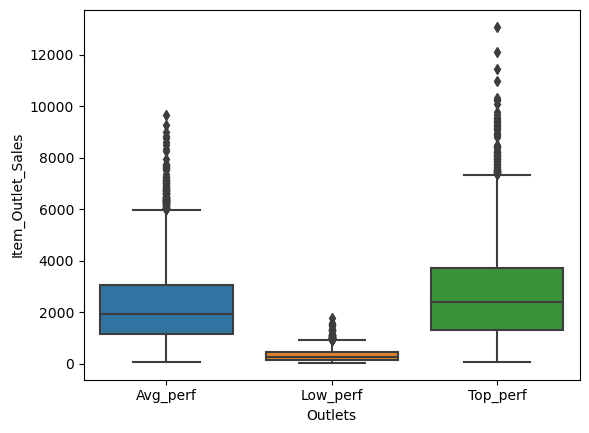

In [144]:
sns.boxplot(data=combined,x='Outlets',y='Item_Outlet_Sales')

In [145]:
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf
3,FDX07,19.20,Regular,0.022919,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf
4,NCD19,8.93,Non_Edible,0.013206,Non_Eatery,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Non_Perishables,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,Top_perf
14200,FDD47,7.60,Regular,0.142991,Perishables,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD,Avg_perf
14201,NCO17,10.00,Non_Edible,0.073529,Non_Eatery,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,NC,Avg_perf
14202,FDJ26,15.30,Regular,0.084897,Non_Perishables,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,FD,Avg_perf


In [146]:
#Vintage of the outlet  (or how old the outlet is)
combined['Vintage']=2013-combined.Outlet_Establishment_Year

In [147]:
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14
3,FDX07,19.20,Regular,0.022919,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15
4,NCD19,8.93,Non_Edible,0.013206,Non_Eatery,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Non_Perishables,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,Top_perf,16
14200,FDD47,7.60,Regular,0.142991,Perishables,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD,Avg_perf,4
14201,NCO17,10.00,Non_Edible,0.073529,Non_Eatery,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,NC,Avg_perf,11
14202,FDJ26,15.30,Regular,0.084897,Non_Perishables,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,FD,Avg_perf,6


<AxesSubplot:>

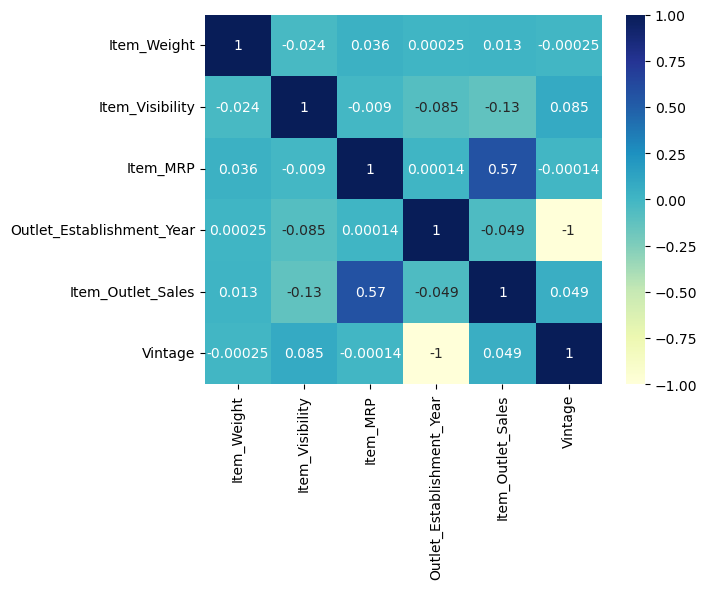

In [148]:
sns.heatmap(combined.corr(),annot=True,cmap='YlGnBu') # vintage has much less than 50% correlation with the target
                                                        #hence of no use to us

In [149]:
#MRP  vs weight --> Price_Per_Unit
combined['Price_Per_Unit']=combined.Item_MRP/combined.Item_Weight

<AxesSubplot:xlabel='Price_Per_Unit', ylabel='Item_Outlet_Sales'>

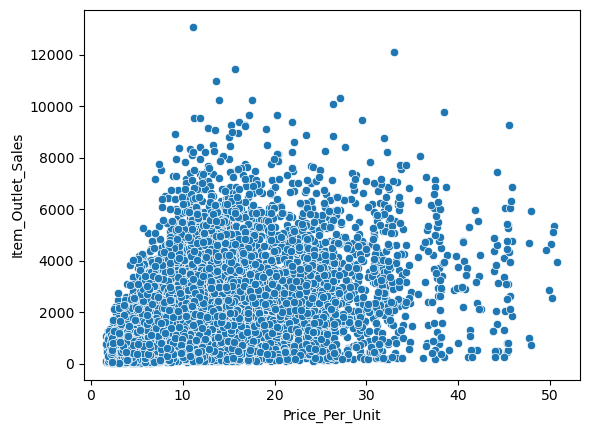

In [150]:
sns.scatterplot(data=combined,x='Price_Per_Unit',y='Item_Outlet_Sales')

<AxesSubplot:>

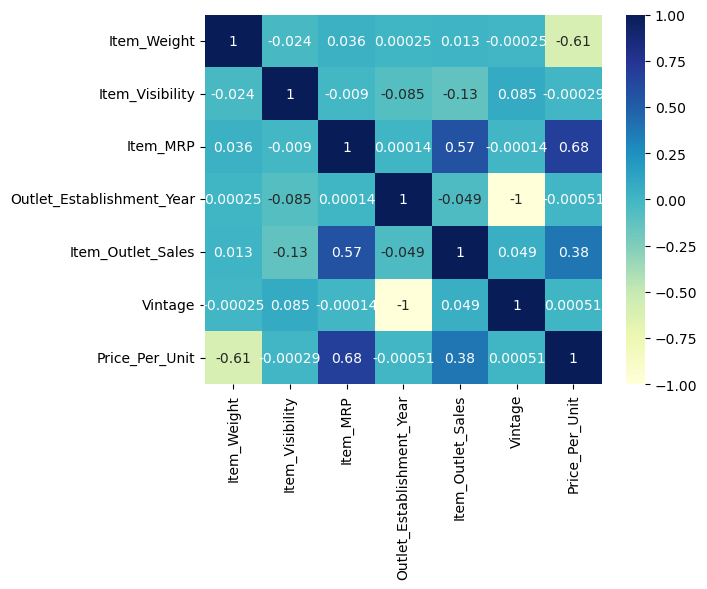

In [151]:
sns.heatmap(combined.corr(),annot=True,cmap='YlGnBu')

In [152]:
#observe while FE we did not bin nos rather uses '/' ormathematical operators for creating new features
# binning the no. col will reduce the model performance but how we created the feature won't
#Remember as the target col is numerical .If predictors are numerical than being categorical
#then the model will give better o/p

In [153]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item.IDS', 'Outlets', 'Vintage',
       'Price_Per_Unit'],
      dtype='object')

In [154]:
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,26.861204
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,8.092457
3,FDX07,19.20,Regular,0.022919,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,9.484115
4,NCD19,8.93,Non_Edible,0.013206,Non_Eatery,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,6.031512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Non_Perishables,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,FD,Top_perf,16,13.458610
14200,FDD47,7.60,Regular,0.142991,Perishables,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,FD,Avg_perf,4,22.255895
14201,NCO17,10.00,Non_Edible,0.073529,Non_Eatery,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,NC,Avg_perf,11,11.874400
14202,FDJ26,15.30,Regular,0.084897,Non_Perishables,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,FD,Avg_perf,6,14.027569


In [155]:
#drop the unnecesssary columns
combined.drop(['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

#sir has written an article on feature engineering  on titanic on medium

In [156]:
combined

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,9.30,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,26.861204
1,5.92,Regular,0.019278,Non_Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,8.153581
2,17.50,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,8.092457
3,19.20,Regular,0.022919,Perishables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,9.484115
4,8.93,Non_Edible,0.013206,Non_Eatery,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,6.031512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Non_Perishables,141.3154,Small,Tier 1,Supermarket Type1,NaN,FD,Top_perf,16,13.458610
14200,7.60,Regular,0.142991,Perishables,169.1448,Medium,Tier 3,Supermarket Type2,NaN,FD,Avg_perf,4,22.255895
14201,10.00,Non_Edible,0.073529,Non_Eatery,118.7440,Small,Tier 2,Supermarket Type1,NaN,NC,Avg_perf,11,11.874400
14202,15.30,Regular,0.084897,Non_Perishables,214.6218,Small,Tier 2,Supermarket Type1,NaN,FD,Avg_perf,6,14.027569


In [157]:
pd.set_option('display.max_columns',50)
pd.get_dummies(combined,drop_first=True)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Vintage,Price_Per_Unit,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Non_Perishables,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item.IDS_FD,Item.IDS_NC,Outlets_Low_perf,Outlets_Top_perf
0,9.30,0.016047,249.8092,3735.1380,14,26.861204,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
1,5.92,0.019278,48.2692,443.4228,4,8.153581,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,14,8.092457,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3,19.20,0.022919,182.0950,732.3800,15,9.484115,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
4,8.93,0.013206,53.8614,994.7052,26,6.031512,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,NaN,16,13.458610,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
14200,7.60,0.142991,169.1448,NaN,4,22.255895,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0
14201,10.00,0.073529,118.7440,NaN,11,11.874400,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0
14202,15.30,0.084897,214.6218,NaN,6,14.027569,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0


### Outliers Analysis

Here at this stage, we will split the data in Train and Test.

``The No of Columns/Features in the Test Set is always n-1 where n is the total no of columns in the Train Set.``

* Train set is the data from where the model will learn the pattern because it has predictors and the target variable.

* Test is the data where we will do the prediction and check the performance of the model...


#### Rule of Identifying the Outliers

* Any value **greater than (Q3 + 1.5 * IQR)** is known as Outlier. This is called **Upper Outlier**

* Similary, Any value **less than (Q1 - 1.5 * IQR)** is known as **Lower Outlier**

In [1]:
# Splitting the Data back in train and test....

train.shape, test.shape, combined.shape

NameError: name 'train' is not defined

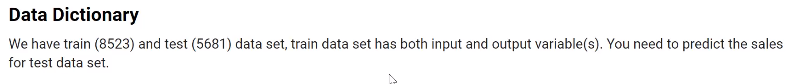

Hence we need no. of rows same in train n test

In [159]:
newtrain = combined.loc[0:train.shape[0]-1, ]  #8523 rd row should be included in test set as index xount starts from 0
newtest = combined.loc[train.shape[0]:, ]

In [160]:
newtrain.shape,newtest.shape

((8523, 13), (5681, 13))

In [161]:
newtrain

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,9.300,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,26.861204
1,5.920,Regular,0.019278,Non_Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,8.153581
2,17.500,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,8.092457
3,19.200,Regular,0.022919,Perishables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,9.484115
4,8.930,Non_Edible,0.013206,Non_Eatery,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,6.031512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Non_Perishables,214.5218,High,Tier 3,Supermarket Type1,2778.3834,FD,Top_perf,26,31.248623
8519,8.380,Regular,0.046982,Non_Perishables,108.1570,Small,Tier 2,Supermarket Type1,549.2850,FD,Avg_perf,11,12.906563
8520,10.600,Non_Edible,0.035186,Non_Eatery,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,NC,Avg_perf,9,8.030415
8521,7.210,Regular,0.145221,Non_Perishables,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Avg_perf,4,14.304189


In [162]:
# Lets Frame the Rules
q3 = newtrain.quantile(0.75)
q1 = newtrain.quantile(0.25)

# Inter Quartile Range
IQR = q3 - q1

# Upper Outlier Cut off
upper = q3 + 1.5*IQR

# Lower Outlier Cut off
lower = q1 - 1.5*IQR

In [163]:
#newtrain.select_dtypes(exclude=object)

In [164]:
upper,lower

(Item_Weight            28.947500
 Item_Visibility         0.197967
 Item_MRP              323.369500
 Item_Outlet_Sales    6501.869900
 Vintage                51.500000
 Price_Per_Unit         30.551752
 dtype: float64,
 Item_Weight            -3.312500
 Item_Visibility        -0.068653
 Item_MRP              -43.899300
 Item_Outlet_Sales   -2566.326100
 Vintage               -16.500000
 Price_Per_Unit         -7.534898
 dtype: float64)

In [165]:
# Lets Remove the Outliers from the Train Dataset only....

# .any(axis = 1) represents that the condition should be checked for all
# the rows and wherever the condition is met, it should produce the data...

wt_outliers = newtrain.loc[~((newtrain>upper) | \
                             (newtrain<lower)).any(axis = 1)]

In [166]:
wt_outliers.shape

(7882, 13)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

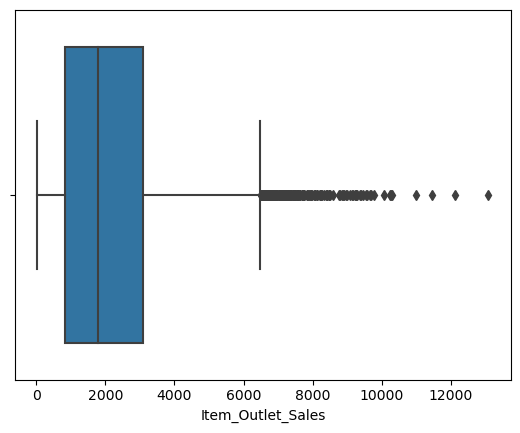

In [167]:
sns.boxplot(data=newtrain,x='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Outlet_Sales'>

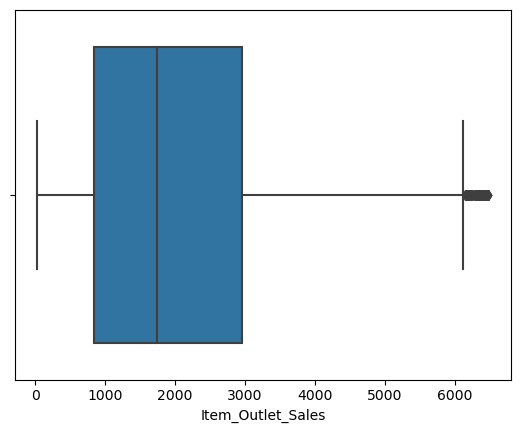

In [168]:
sns.boxplot(data=wt_outliers,x='Item_Outlet_Sales')

### Scaling post Outliers

In [169]:
wt_outliers.select_dtypes(include='number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Vintage', 'Price_Per_Unit'],
      dtype='object')

In [170]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [171]:
# Applying it in Train and Test Together

nums = ['Item_Weight', 'Item_Visibility', 
        'Item_MRP','Price_Per_Unit']

for i in nums:
    # Scaling the Train Features
    wt_outliers.loc[:, i] = sc.fit_transform(pd.DataFrame\
                                             (wt_outliers.loc[:, i]))    
    # Scale the Test Set Features.
    newtest.loc[:,i] = sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [172]:
wt_outliers.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846342,Low Fat,-1.148498,Perishables,1.905015,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,2.378265
1,-1.590493,Regular,-1.076599,Non_Perishables,-1.458456,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,-0.537468


In [173]:
#we don't scale the target var in train n test 
# data leakage concept
# fit ---> learn
# fitransform-->learn n transforms
#we fit_transform train data set where as just transofrm the test one as we want the instance to learn  from train
# n appy it in train and apply the same learning in test else it would be like data leakage
# inteligence rd sharma se ati hai n exam ka paper usi inteligence se solve krte hain


In [174]:
#mukul sir's ppt refer for notes of video 1 n 2

### Outliers Using Z Score 

* Generally the Z Score is applied on the Target variable...

#### Empirical Rule

* 68.3% Data lies within +/- 1 S.D.
* 95.44% Data lies within +/- 2 S.D.
* 99.7% Data lies within +/- 3 S.D.

In [175]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,9.30,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,26.861204
1,5.92,Regular,0.019278,Non_Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,8.153581
2,17.50,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,8.092457
3,19.20,Regular,0.022919,Perishables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,9.484115
4,8.93,Non_Edible,0.013206,Non_Eatery,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,6.031512


In [176]:
newtrain.shape

(8523, 13)

In [177]:
#find the Z score of the target var
from scipy.stats import zscore

newtrain['z_scaled']=zscore(newtrain.Item_Outlet_Sales)

In [178]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit,z_scaled
0,9.30,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,26.861204,0.910601
1,5.92,Regular,0.019278,Non_Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,8.153581,-1.018440
2,17.50,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,8.092457,-0.049238
3,19.20,Regular,0.022919,Perishables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,9.484115,-0.849103
4,8.93,Non_Edible,0.013206,Non_Eatery,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,6.031512,-0.695373


In [179]:

# Condition is: Any value greater than  or less than +/-3 Sigma/Zscore is
# An Outlier...
newtrain.loc[np.abs(newtrain.z_scaled)>3].shape#Outlier data


(90, 14)

In [180]:
# Data After Outliers Removal....
newtrain.loc[np.abs(newtrain.z_scaled)<=3].shape

(8433, 14)

In [181]:
# if u get time read robust scaler n isolated forest

In [182]:
newtrain # sir said now that data is here save it n drop the scaled column which we had made
#doubt

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit,z_scaled
0,9.300,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,26.861204,0.910601
1,5.920,Regular,0.019278,Non_Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,8.153581,-1.018440
2,17.500,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,8.092457,-0.049238
3,19.200,Regular,0.022919,Perishables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,9.484115,-0.849103
4,8.930,Non_Edible,0.013206,Non_Eatery,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,6.031512,-0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Non_Perishables,214.5218,High,Tier 3,Supermarket Type1,2778.3834,FD,Top_perf,26,31.248623,0.349915
8519,8.380,Regular,0.046982,Non_Perishables,108.1570,Small,Tier 2,Supermarket Type1,549.2850,FD,Avg_perf,11,12.906563,-0.956402
8520,10.600,Non_Edible,0.035186,Non_Eatery,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,NC,Avg_perf,9,8.030415,-0.579100
8521,7.210,Regular,0.145221,Non_Perishables,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Avg_perf,4,14.304189,-0.196725


In [183]:
# Finding the Mean Sales of Outlets
mean_sales = train.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].mean().to_dict()

In [184]:
# Target Encoding of Outlets
train["Outlet_Mean_Sales"] = train.Outlet_Identifier.map(mean_sales)

In [185]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Mean_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2348.354635
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1995.498739
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2348.354635
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,339.351662
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2298.995256


<AxesSubplot:>

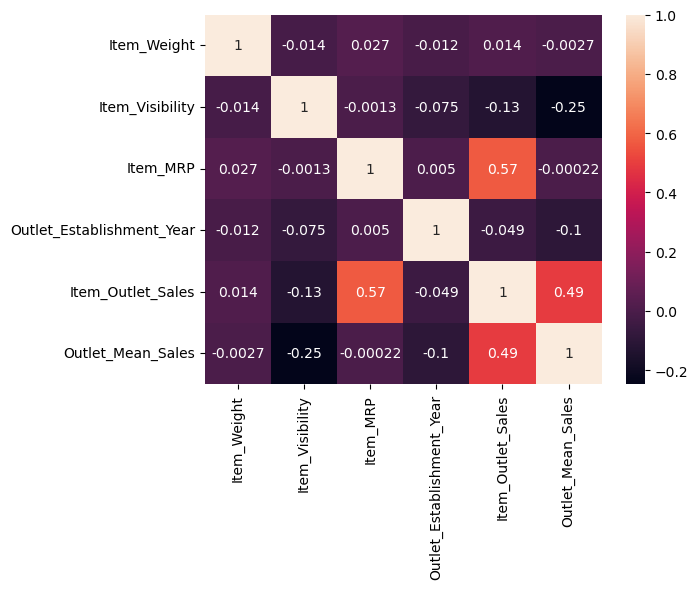

In [186]:
sns.heatmap(train.corr(),annot=True)

In [187]:
# Encoding Test Set basis Target variable...
test["Outlet_Mean_Sales"] = test.Outlet_Identifier.map(mean_sales)

In [188]:
mean_sales

{'OUT010': 339.351661981982,
 'OUT013': 2298.995255579399,
 'OUT017': 2340.67526349892,
 'OUT018': 1995.498739224138,
 'OUT019': 340.3297227272727,
 'OUT027': 3694.0385576470585,
 'OUT035': 2438.841866021505,
 'OUT045': 2192.384797631862,
 'OUT046': 2277.8442668817206,
 'OUT049': 2348.3546346236562}

In [189]:
train["Outlet_Sales_Std"] = train.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("std")

train["Outlet_Sales_Median"] = train.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("median")

<AxesSubplot:>

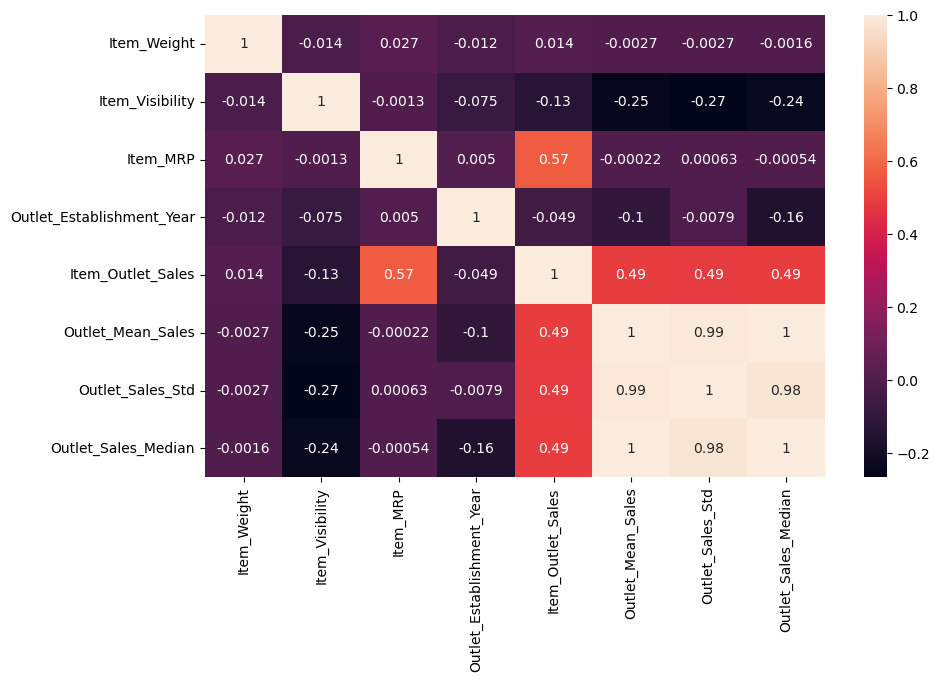

In [190]:
plt.figure(figsize = (10, 6))
sns.heatmap(train.corr(), annot = True)

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

In [191]:
wt_outliers.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846342,Low Fat,-1.148498,Perishables,1.905015,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,2.378265
1,-1.590493,Regular,-1.076599,Non_Perishables,-1.458456,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,-0.537468
2,0.958995,Low Fat,-1.132636,Perishables,0.099428,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,-0.546995
3,1.333272,Regular,-0.995583,Perishables,0.774943,Small,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,-0.330094
4,-0.927802,Non_Edible,-1.211722,Non_Eatery,-1.365129,High,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,-0.868210


In [192]:
wt_outliers.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [193]:
# dictionary to map the Outlet Size....

dict_size = {"Medium":3, "Small":2, "High":1}
wt_outliers["Outlet_Size"] = wt_outliers["Outlet_Size"].map(dict_size)
wt_outliers

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846342,Low Fat,-1.148498,Perishables,1.905015,3,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,2.378265
1,-1.590493,Regular,-1.076599,Non_Perishables,-1.458456,3,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,-0.537468
2,0.958995,Low Fat,-1.132636,Perishables,0.099428,3,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,-0.546995
3,1.333272,Regular,-0.995583,Perishables,0.774943,2,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,-0.330094
4,-0.927802,Non_Edible,-1.211722,Non_Eatery,-1.365129,1,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,-0.868210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,1.674525,Regular,0.354936,Non_Perishables,0.720483,2,Tier 1,Supermarket Type1,3608.6360,FD,Top_perf,16,-0.465023
8519,-1.048892,Regular,-0.460082,Non_Perishables,-0.458998,2,Tier 2,Supermarket Type1,549.2850,FD,Avg_perf,11,0.203322
8520,-0.560130,Non_Edible,-0.722588,Non_Eatery,-0.843419,2,Tier 2,Supermarket Type1,1193.1136,NC,Avg_perf,9,-0.556665
8521,-1.306483,Regular,1.726068,Non_Perishables,-0.542839,3,Tier 3,Supermarket Type2,1845.5976,FD,Avg_perf,4,0.421153


In [194]:
newtest["Outlet_Size"] = newtest["Outlet_Size"].map(dict_size)

In [195]:
# Frequency Encoding on Outlet Type
#train.Item_Type.value_counts(normalize = True).to_dict()  # -->normalize = True convt. into proportion (values of the chosen column is very
#near so not applicable for frequency encoding, hence just for understanding)

# after encding the data (in freq enc) we cannot scale the data 

In [196]:
wt_outliers

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846342,Low Fat,-1.148498,Perishables,1.905015,3,Tier 1,Supermarket Type1,3735.1380,FD,Avg_perf,14,2.378265
1,-1.590493,Regular,-1.076599,Non_Perishables,-1.458456,3,Tier 3,Supermarket Type2,443.4228,DR,Avg_perf,4,-0.537468
2,0.958995,Low Fat,-1.132636,Perishables,0.099428,3,Tier 1,Supermarket Type1,2097.2700,FD,Avg_perf,14,-0.546995
3,1.333272,Regular,-0.995583,Perishables,0.774943,2,Tier 3,Grocery Store,732.3800,FD,Low_perf,15,-0.330094
4,-0.927802,Non_Edible,-1.211722,Non_Eatery,-1.365129,1,Tier 3,Supermarket Type1,994.7052,NC,Top_perf,26,-0.868210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,1.674525,Regular,0.354936,Non_Perishables,0.720483,2,Tier 1,Supermarket Type1,3608.6360,FD,Top_perf,16,-0.465023
8519,-1.048892,Regular,-0.460082,Non_Perishables,-0.458998,2,Tier 2,Supermarket Type1,549.2850,FD,Avg_perf,11,0.203322
8520,-0.560130,Non_Edible,-0.722588,Non_Eatery,-0.843419,2,Tier 2,Supermarket Type1,1193.1136,NC,Avg_perf,9,-0.556665
8521,-1.306483,Regular,1.726068,Non_Perishables,-0.542839,3,Tier 3,Supermarket Type2,1845.5976,FD,Avg_perf,4,0.421153


In [197]:
newtest

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item.IDS,Outlets,Vintage,Price_Per_Unit
8523,1.674525,Low Fat,-1.337263,Non_Perishables,-0.463918,3,Tier 1,Supermarket Type1,NaN,FD,Avg_perf,14,-0.998092
8524,-1.066505,Regular,-0.650455,Perishables,-0.806747,2,Tier 2,Supermarket Type1,NaN,FD,Avg_perf,6,-0.168572
8525,0.320522,Non_Edible,0.710288,Non_Eatery,1.770579,2,Tier 3,Grocery Store,NaN,NC,Low_perf,15,0.772502
8526,-1.283366,Low Fat,-1.163161,Non_Perishables,0.323326,2,Tier 2,Supermarket Type1,NaN,FD,Avg_perf,6,1.494983
8527,0.100359,Regular,1.133649,Perishables,1.645016,3,Tier 3,Supermarket Type3,NaN,FD,Top_perf,28,0.876041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,-0.582146,Regular,-1.205263,Non_Perishables,0.094378,2,Tier 1,Supermarket Type1,NaN,FD,Top_perf,16,0.289363
14200,-1.220619,Regular,1.676448,Perishables,0.558819,3,Tier 3,Supermarket Type2,NaN,FD,Avg_perf,4,1.660490
14201,-0.692228,Non_Edible,0.130664,Non_Eatery,-0.282313,2,Tier 2,Supermarket Type1,NaN,NC,Avg_perf,11,0.042451
14202,0.474636,Regular,0.383652,Non_Perishables,1.317777,2,Tier 2,Supermarket Type1,NaN,FD,Avg_perf,6,0.378040


In [198]:
# One Hot Encoding....

dummytrain = pd.get_dummies(wt_outliers, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [199]:
dummytrain.shape, dummytest.shape

((7882, 20), (5681, 20))

In [200]:
dummytrain

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Vintage,Price_Per_Unit,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Non_Perishables,Item_Type_Perishables,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item.IDS_FD,Item.IDS_NC,Outlets_Low_perf,Outlets_Top_perf
0,-0.846342,-1.148498,1.905015,3,3735.1380,14,2.378265,0,0,0,1,0,0,1,0,0,1,0,0,0
1,-1.590493,-1.076599,-1.458456,3,443.4228,4,-0.537468,0,1,1,0,0,1,0,1,0,0,0,0,0
2,0.958995,-1.132636,0.099428,3,2097.2700,14,-0.546995,0,0,0,1,0,0,1,0,0,1,0,0,0
3,1.333272,-0.995583,0.774943,2,732.3800,15,-0.330094,0,1,0,1,0,1,0,0,0,1,0,1,0
4,-0.927802,-1.211722,-1.365129,1,994.7052,26,-0.868210,1,0,0,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,1.674525,0.354936,0.720483,2,3608.6360,16,-0.465023,0,1,1,0,0,0,1,0,0,1,0,0,1
8519,-1.048892,-0.460082,-0.458998,2,549.2850,11,0.203322,0,1,1,0,1,0,1,0,0,1,0,0,0
8520,-0.560130,-0.722588,-0.843419,2,1193.1136,9,-0.556665,1,0,0,0,1,0,1,0,0,0,1,0,0
8521,-1.306483,1.726068,-0.542839,3,1845.5976,4,0.421153,0,1,1,0,0,1,0,1,0,1,0,0,0


In [201]:
# remove tgt from dummytest
dummytest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

In [202]:
dummytest.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Vintage,Price_Per_Unit,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Non_Perishables,Item_Type_Perishables,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item.IDS_FD,Item.IDS_NC,Outlets_Low_perf,Outlets_Top_perf
8523,1.674525,-1.337263,-0.463918,3,14,-0.998092,0,0,1,0,0,0,1,0,0,1,0,0,0
8524,-1.066505,-0.650455,-0.806747,2,6,-0.168572,0,1,0,1,1,0,1,0,0,1,0,0,0
8525,0.320522,0.710288,1.770579,2,15,0.772502,1,0,0,0,0,1,0,0,0,0,1,1,0
8526,-1.283366,-1.163161,0.323326,2,6,1.494983,0,0,1,0,1,0,1,0,0,1,0,0,0
8527,0.100359,1.133649,1.645016,3,28,0.876041,0,1,0,1,0,1,0,0,1,1,0,0,1


### Modelling

In [206]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()

X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

pred = gbm.fit(X, y).predict(dummytest)

In [207]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales": np.abs(pred)})

In [208]:
submission.to_csv("GBMModel.csv", index = False) # 1237.5